# ABC for FMC agent-based modelling in demon/warlock

## Procedure
1) Sample a parameter set $\theta$ from the prior
2) Sample a random seed $r$ for the simulation
3) Run the model until the generation limit is reached
4) Repeat from step 2 until the number of simulated glands is the same as in the data
5) Compute wasserstein distances $W(X, X')$ of the simulations to the observed data averaged over all glands
6) If $W(X, X') < \epsilon$, accept $\theta$ as a sample from the posterior distribution
7) Go to 1

In [2]:
import numpy as np
import os
import pandas as pd
import subprocess
import matplotlib.pyplot as plt

from scipy.stats import wasserstein_distance

In [8]:
data_dir = "/Users/vesheljinn/Documents/github_repos/methABC/data/crc_with_healthy_labels/"
sims_dir = "/Users/vesheljinn/Documents/github_repos/methABC/data/intra-deme/methylation/"

In [9]:
def run_sim(config_file_path, warlockdir):
    command = ['bash', 'warlock.sh', '-c', config_file_path, '-e', 'local']
    subprocess.run(command, cwd=warlockdir)

Post-processing functions:

In [10]:
def load_sim(filename):
    sim = pd.read_csv(filename)
    return sim

def distance(sim, data):
    return wasserstein_distance(sim, data)

Iterate over each sim and data set, calculate distance, create matrix of Wasserstein distances:

In [11]:
def get_priors():
    mu = np.random.uniform(0.00001, 0.001)
    s = np.random.uniform(0, 0.4)
    return mu, s

def edit_param_file(oldfilepath, newfilepath):
    with open(oldfilepath, 'r') as file:
        data = yaml.safe_load(file)
    priors = get_priors()
    data['demon_mu_driver_birth'] = priors[0]
    data['demon_s_driver_birth'] = priors[1]

    with open(newfilepath, 'w') as file:
        yaml.dump(data, file)
    return

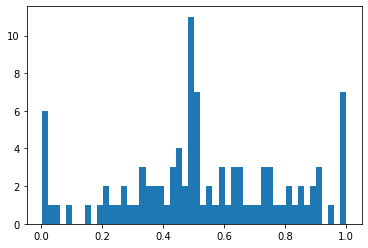

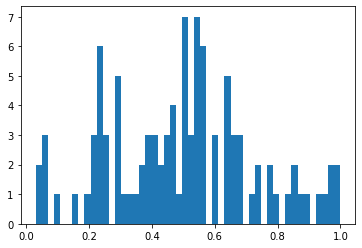

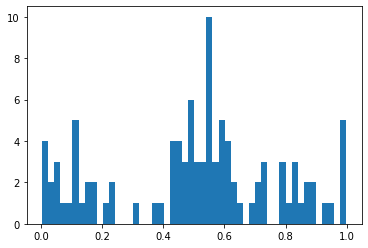

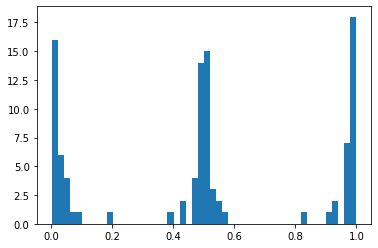

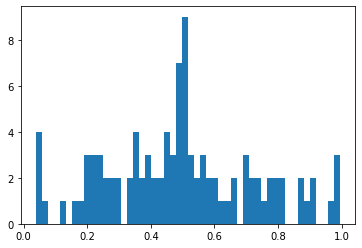

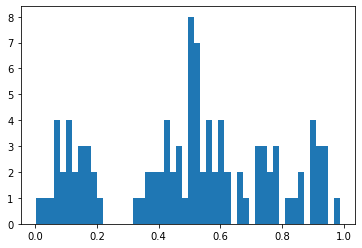

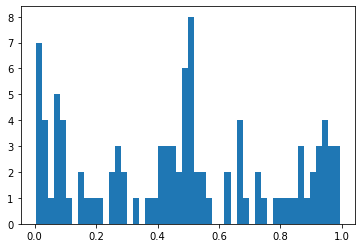

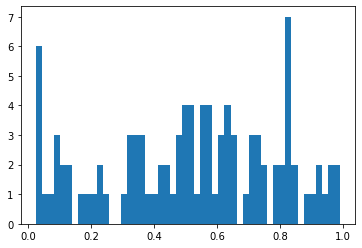

In [12]:
simulation_files = os.listdir(sims_dir)
example_array = pd.read_csv(data_dir+"D.csv").iloc[:,1]

wass_list = list()
for simulation_file in simulation_files:
    simulation_path = os.path.join(sims_dir, simulation_file)
    simulation_data = pd.read_csv(simulation_path, index_col=False).iloc[:,0]
    wass_list.append(distance(simulation_data, example_array))
    plt.hist(simulation_data, bins=50)
    plt.show()

In [13]:
sum(wass_list)/len(wass_list)

0.2058557098107899

(array([4., 1., 0., 0., 1., 0., 1., 1., 3., 3., 3., 2., 2., 2., 0., 2., 4.,
        2., 3., 2., 2., 4., 3., 7., 9., 3., 2., 3., 2., 2., 1., 1., 2., 0.,
        3., 2., 2., 1., 2., 2., 2., 0., 0., 2., 1., 2., 0., 0., 1., 3.]),
 array([0.03804878, 0.0572    , 0.07635122, 0.09550244, 0.11465366,
        0.13380488, 0.1529561 , 0.17210732, 0.19125854, 0.21040976,
        0.22956098, 0.2487122 , 0.26786341, 0.28701463, 0.30616585,
        0.32531707, 0.34446829, 0.36361951, 0.38277073, 0.40192195,
        0.42107317, 0.44022439, 0.45937561, 0.47852683, 0.49767805,
        0.51682927, 0.53598049, 0.55513171, 0.57428293, 0.59343415,
        0.61258537, 0.63173659, 0.6508878 , 0.67003902, 0.68919024,
        0.70834146, 0.72749268, 0.7466439 , 0.76579512, 0.78494634,
        0.80409756, 0.82324878, 0.8424    , 0.86155122, 0.88070244,
        0.89985366, 0.91900488, 0.9381561 , 0.95730732, 0.97645854,
        0.99560976]),
 <BarContainer object of 50 artists>)

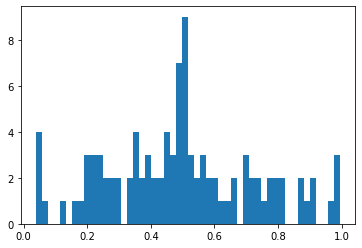

In [14]:
example_data_path = os.path.join(sims_dir, "00000000.csv")
example_data = pd.read_csv(example_data_path, index_col=False).iloc[:,0]
plt.hist(example_data, bins=50)

(array([ 726., 1419.,  655.,  347.,  181.,  151.,  125.,   98.,   81.,
          67.,   53.,   52.,   37.,   56.,   40.,   28.,   31.,   61.,
          87.,   85.,   90.,   74.,  127.,  138.,  218.,  212.,  229.,
         176.,  135.,  124.,   64.,   67.,   42.,   29.,   20.,   23.,
          20.,   24.,   18.,   16.,   25.,   25.,   24.,   32.,   69.,
          94.,  102.,  143.,  199.,   81.]),
 array([0.01445736, 0.03354017, 0.05262298, 0.07170579, 0.0907886 ,
        0.10987141, 0.12895422, 0.14803703, 0.16711984, 0.18620265,
        0.20528546, 0.22436827, 0.24345108, 0.26253389, 0.2816167 ,
        0.30069951, 0.31978232, 0.33886513, 0.35794794, 0.37703075,
        0.39611356, 0.41519637, 0.43427918, 0.45336199, 0.4724448 ,
        0.49152761, 0.51061042, 0.52969323, 0.54877604, 0.56785885,
        0.58694165, 0.60602446, 0.62510727, 0.64419008, 0.66327289,
        0.6823557 , 0.70143851, 0.72052132, 0.73960413, 0.75868694,
        0.77776975, 0.79685256, 0.81593537, 0.83501818, 

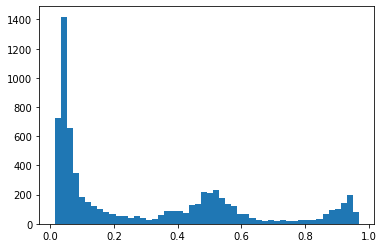

In [15]:
plt.hist(example_array, bins=50)

In [16]:
distance(example_array, example_data)

0.199030418402931